<a href="https://colab.research.google.com/github/sai-hemanth-kalidindi/Miniproject_2/blob/main/Mini%20Project%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving archive (1).zip to archive (1).zip


In [2]:
# Step 1: Install pyarrow to read Parquet files
!pip install pyarrow

# Step 2: Unzip the uploaded archive
import zipfile
import os

with zipfile.ZipFile("/content/archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall("/content/asrs_data")

# Step 3: Load the parquet files using pandas
import pandas as pd

train_path = "/content/asrs_data/train_data_int.parquet"
test_path = "/content/asrs_data/test_data_int.parquet"

train_df = pd.read_parquet(train_path)
test_df = pd.read_parquet(test_path)

# Step 4: Preview the dataset
train_df.head()


,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Flight Conditions,Weather Elements / Visibility,...,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative.1,Callback.1,Synopsis,Year
0,201404,1201-1800,ZZZ.Airport,US,NaN,NaN,0.0,NaN,VMC,None,...,In-flight,Flight Crew Returned To Gate; Flight Crew Reje...,Aircraft; Environment - Non Weather Related; P...,Environment - Non Weather Related,I was the pilot flying performing the takeoff....,None,At approximately 75 KTS I glanced at my airspe...,None,A B767 Captain; the pilot not flying; rejected...,2014
1,201006,1801-2400,SFO.Airport,CA,NaN,NaN,0.0,NaN,None,None,...,Pre-flight,General None Reported / Taken,Human Factors,Human Factors,We had 6 shipments of dry ice for the flight; ...,None,None,None,A B767-300 Pilot reported his Dangerous Goods ...,2010
2,201201,0601-1200,EGLL.Airport,FO,NaN,NaN,None,4000.0,None,None,...,In-flight,General None Reported / Taken,Procedure; Company Policy; Human Factors; Manuals,Company Policy,I have seen a lot of mistakes on every flight ...,None,None,None,The Captain of an international flight crew re...,2012
3,201810,0001-0600,EUG.Airport,OR,NaN,NaN,None,3900.0,VMC,None,...,In-flight,Flight Crew Took Evasive Action,Human Factors; Procedure,Ambiguous,It was my first time flying into KEUG and I wa...,None,Night VMC visual approach left base leg into E...,None,Air carrier flight crew reported receiving a T...,2018
4,202001,1801-2400,MDW.Airport,IL,NaN,5.0,None,2000.0,None,None,...,In-flight,General None Reported / Taken,Procedure,Procedure,I am writing this report to bring attention to...,None,None,None,Air Carrier First Officer reported that the us...,2020


In [3]:
train_df.info()
train_df.isnull().sum().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97417 entries, 0 to 97416
Data columns (total 96 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Date                                                  97417 non-null  int64  
 1   Local Time Of Day                                     89551 non-null  object 
 2   Locale Reference                                      96604 non-null  object 
 3   State Reference                                       97417 non-null  object 
 4   Relative Position.Angle.Radial                        5607 non-null   float64
 5   Relative Position.Distance.Nautical Miles             25536 non-null  float64
 6   Altitude.AGL.Single Value                             40358 non-null  object 
 7   Altitude.MSL.Single Value                             44861 non-null  float64
 8   Flight Conditions                                     62

,0
Maintenance Status.Records Complete.1,97417
Crew Size Flight Attendant.Number Of Crew.1,97417
Aircraft Zone.1,97417
Passengers On Board.Number.1,97413
Number Of Seats.Number.1,97411
Maintenance Status.Maintenance Items Involved.1,97411
Maintenance Status.Required / Correct Doc On Board.1,97411
Aircraft Zone,97410
Maintenance Status.Maintenance Type.1,97410
Cabin Lighting.1,97407


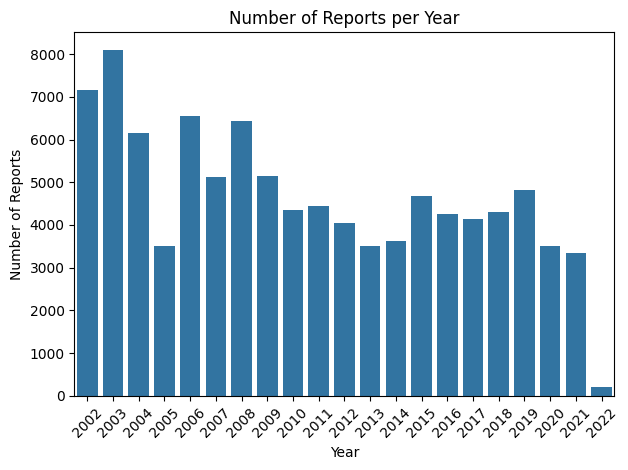

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot incidents per year
sns.countplot(data=train_df, x='Year')
plt.xticks(rotation=45)
plt.title("Number of Reports per Year")
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.tight_layout()
plt.show()


<ipython-input-5-f3905182916f>:5: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


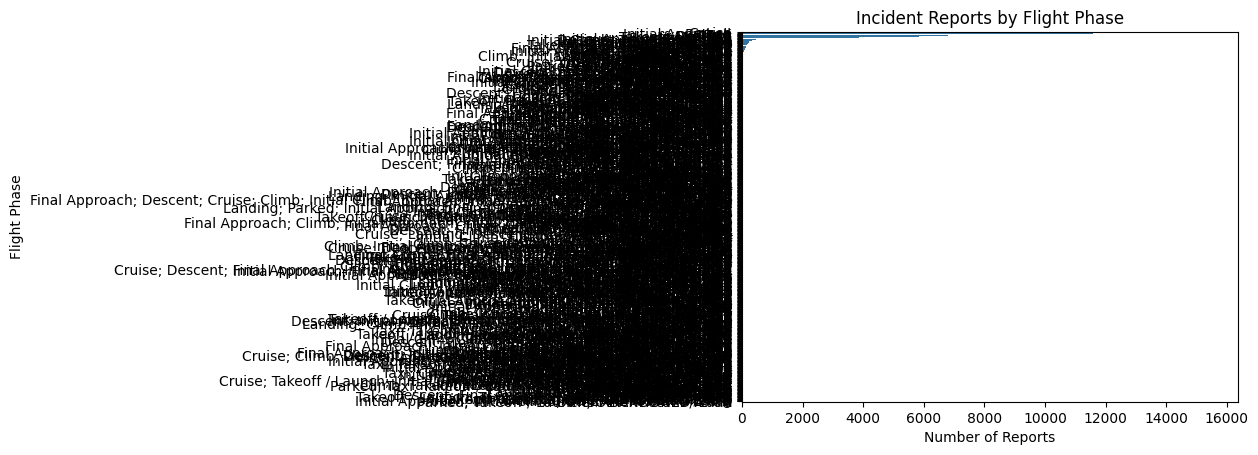

In [5]:
sns.countplot(data=train_df, y='Flight Phase', order=train_df['Flight Phase'].value_counts().index)
plt.title("Incident Reports by Flight Phase")
plt.xlabel("Number of Reports")
plt.ylabel("Flight Phase")
plt.tight_layout()
plt.show()


<ipython-input-6-c26cb120002f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phase_counts.values, y=phase_counts.index, palette='Blues_r')


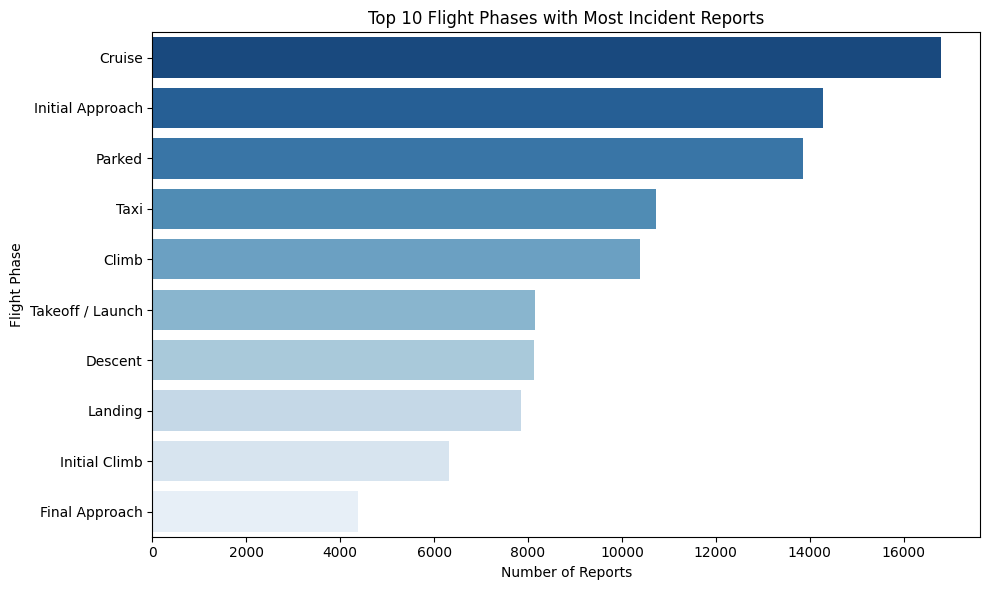

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Clean and split flight phases
# Split phases like "Cruise; Descent" into separate entries
flight_phases = train_df['Flight Phase'].dropna().str.split(';')
flat_phases = [phase.strip() for sublist in flight_phases for phase in sublist]

# Step 2: Create a new DataFrame for counting
import pandas as pd
phase_counts = pd.Series(flat_phases).value_counts().head(10)

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=phase_counts.values, y=phase_counts.index, palette='Blues_r')
plt.title("Top 10 Flight Phases with Most Incident Reports")
plt.xlabel("Number of Reports")
plt.ylabel("Flight Phase")
plt.tight_layout()
plt.show()


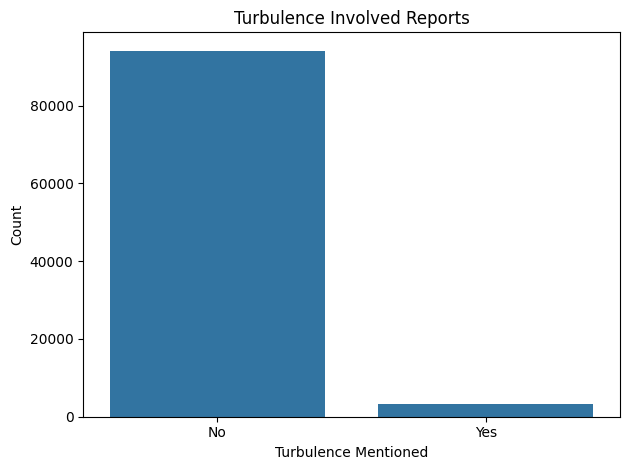

In [7]:
# Flag reports with "turbulence" mentioned
train_df['TurbulenceFlag'] = train_df['Narrative'].str.contains("turbulence", case=False, na=False)

# Count of turbulence-related reports
sns.countplot(data=train_df, x='TurbulenceFlag')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Turbulence Involved Reports")
plt.xlabel("Turbulence Mentioned")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


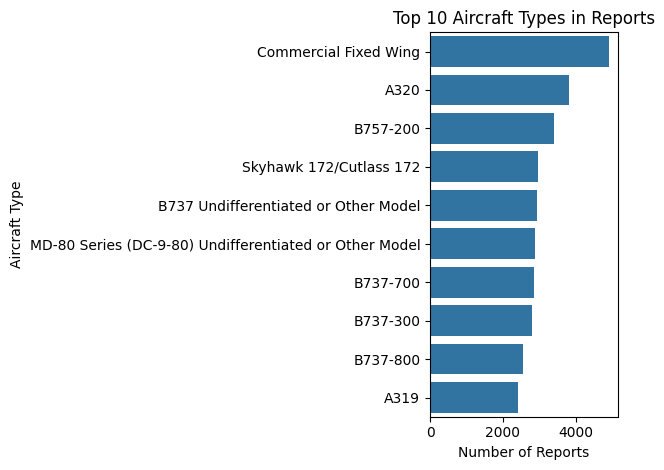

In [8]:
top_aircraft = train_df['Make Model Name'].value_counts().head(10)

sns.barplot(y=top_aircraft.index, x=top_aircraft.values)
plt.title("Top 10 Aircraft Types in Reports")
plt.xlabel("Number of Reports")
plt.ylabel("Aircraft Type")
plt.tight_layout()
plt.show()


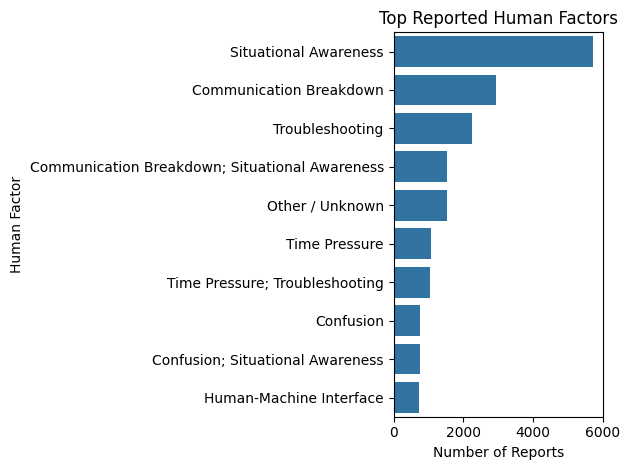

In [9]:
top_factors = train_df['Human Factors'].value_counts().head(10)
sns.barplot(y=top_factors.index, x=top_factors.values)
plt.title("Top Reported Human Factors")
plt.xlabel("Number of Reports")
plt.ylabel("Human Factor")
plt.tight_layout()
plt.show()


<ipython-input-12-33f2658bde9b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hf_counts.values, y=hf_counts.index, palette='Purples')


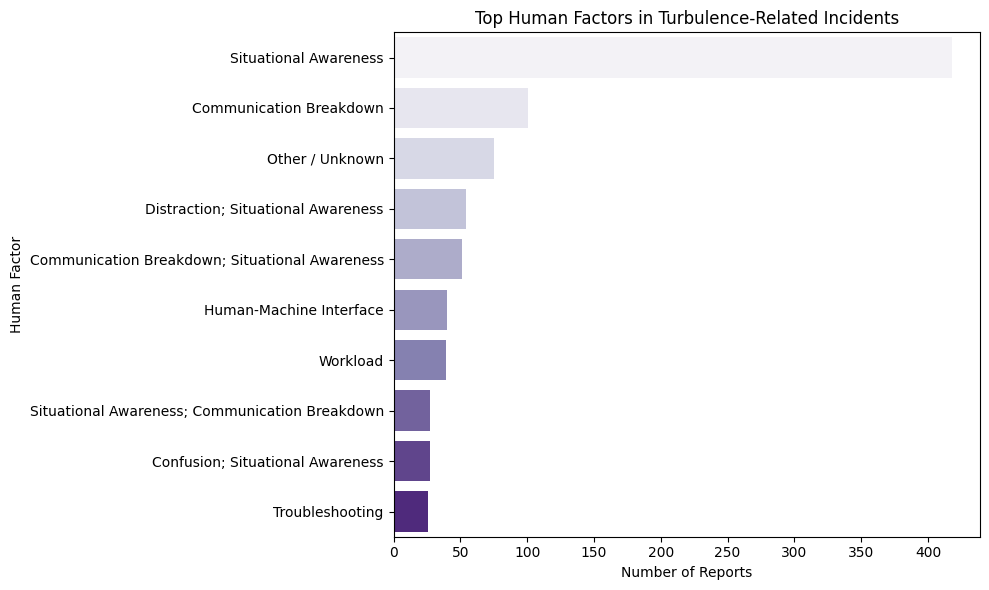

In [12]:

turbulence_df = train_df[train_df['Narrative'].str.contains('turbulence', case=False, na=False)]

# Count most common human factors
hf_counts = turbulence_df['Human Factors'].value_counts().dropna().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=hf_counts.values, y=hf_counts.index, palette='Purples')
plt.title("Top Human Factors in Turbulence-Related Incidents")
plt.xlabel("Number of Reports")
plt.ylabel("Human Factor")
plt.tight_layout()
plt.show()
